In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

# Load dataset 
df = pd.read_csv("C:/Users/arrow/OneDrive/Documents/GitHub/data-science-summer-2025/data/Materials_With_AtLeast_OneMagneticElement.csv") 
target_col = "ordering"              

# Clean and split data
df = df.dropna()
X_all = df.drop(columns=target_col).select_dtypes(include=[np.number])
y_all = LabelEncoder().fit_transform(df[target_col])
target_names = np.unique(df[target_col])
feature_names = X_all.columns

# 60% training / 20% validation / 20% testing split
n = len(df)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

X_train = X_all.iloc[:n_train]
y_train = y_all[:n_train]

X_val = X_all.iloc[n_train:n_train + n_val]
y_val = y_all[n_train:n_train + n_val]

X_test = X_all.iloc[n_train + n_val:]
y_test = y_all[n_train + n_val:]

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [2]:


# Evaluate on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")


print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=target_names))


Validation Accuracy: 0.2887
Test Accuracy: 0.4252

Classification Report (Test Set):
              precision    recall  f1-score   support

         AFM       0.09      0.73      0.16       521
          FM       0.53      0.32      0.39      5130
         FiM       0.18      0.03      0.05       520
          NM       0.74      0.55      0.63      5071

    accuracy                           0.43     11242
   macro avg       0.39      0.41      0.31     11242
weighted avg       0.59      0.43      0.47     11242



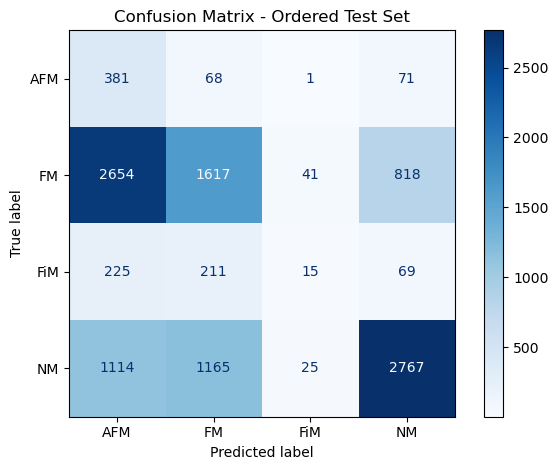

In [3]:


# Confusion Matrix for Test Set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Ordered Test Set")
plt.tight_layout()
plt.show()


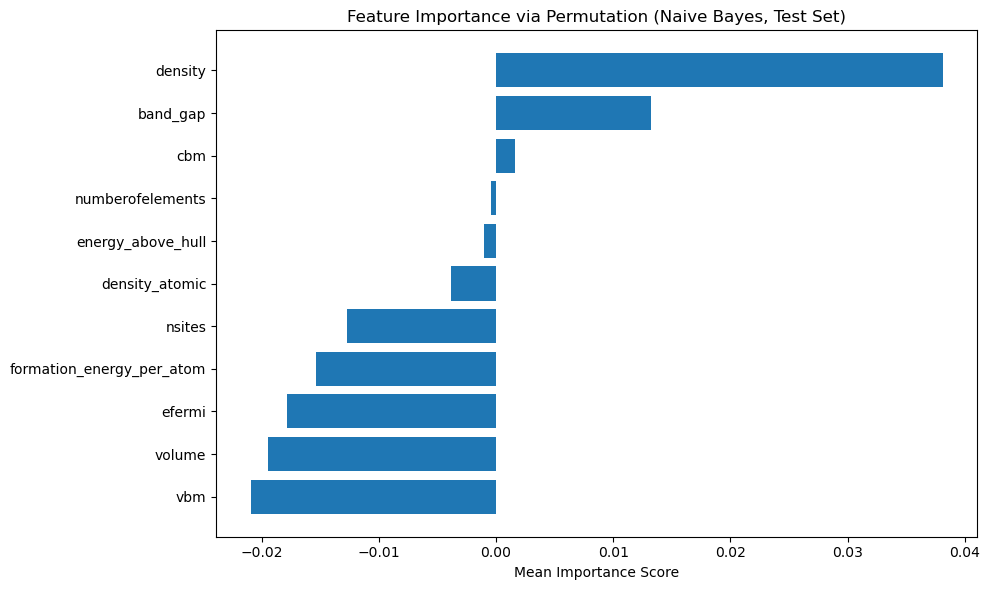

In [4]:

# Feature Importance (Permutation on Test Set)
perm = permutation_importance(model, X_test, y_test, n_repeats=15, random_state=42)
sorted_idx = perm.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm.importances_mean[sorted_idx])
plt.yticks(np.arange(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Mean Importance Score")
plt.title("Feature Importance via Permutation (Naive Bayes, Test Set)")
plt.tight_layout()
plt.show()
